In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import sys
sys.path.append("../") # go to parent dir


In [3]:
model = torch.load("/home/sms/vws/frappe/saved/test/sgd_64/20191022-1233.pt").to("cpu")
model.eval()

Tratt(
  (body): Sequential(
    (0): Conv2d(110, 110, kernel_size=(4, 4), stride=(1, 1))
    (1): BatchNorm2d(110, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(110, 110, kernel_size=(3, 3), stride=(1, 1))
    (5): BatchNorm2d(110, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): MaxPool2d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(110, 110, kernel_size=(3, 3), stride=(1, 1))
    (9): BatchNorm2d(110, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU()
    (11): MaxPool2d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=False)
    (12): Conv2d(110, 110, kernel_size=(3, 3), stride=(1, 1))
    (13): BatchNorm2d(110, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (14): ReLU()
    (15): MaxPool2d(kernel_size=2, stride=2, p

In [4]:
def get_activation(activation, name):
    def hook(model, input, output):
        activation[name] = output.detach()
    return hook

In [47]:
x1 = np.fromfile(r"/home/sms/vws/frappe/saved/test/data/x_1.1.bin", dtype=np.float32)
x2 = np.fromfile(r"/home/sms/vws/frappe/saved/test/data/x_1.2.bin", dtype=np.float32)
x1 = torch.from_numpy(np.reshape(x1, (1, 1, 110, 256, 256)))
x2 = torch.from_numpy(np.reshape(x2, (1, 1, 110, 256, 256)))

#y = np.fromfile(r"/home/sms/vws/frappe/saved/ordinary/y.bin", dtype=np.float32)

X = torch.cat((x1,x2), 0)

#y = torch.from_numpy(np.reshape(y, (16, 3)))


FileNotFoundError: [Errno 2] No such file or directory: '/home/sms/vws/frappe/saved/test/data/x_1.1.bin'

In [12]:
activation = {}
model.body.register_forward_hook(get_activation(activation, 'body'))
output = model(X)
act = activation['body']

In [13]:
curves = act.squeeze().numpy()

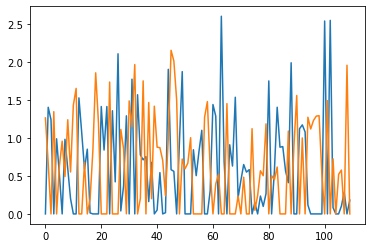

In [17]:
plt.plot(curves[0, :])
plt.plot(curves[1, :])

In [28]:
yhat = model(X)

In [19]:
plt.scatter(yhat[:,0].detach().numpy(), y[:,0].detach().numpy())
plt.plot(np.linspace(1,3), np.linspace(1,3))

NameError: name 'yhat' is not defined

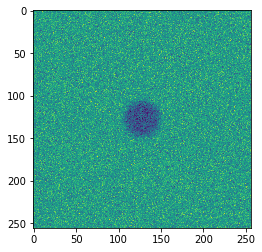

In [63]:
x1 = np.fromfile(r"/home/sms/vws/test/data/data/x_3.1.bin", dtype=np.float32)

x1 = torch.from_numpy(np.reshape(x1, (110, 256, 256)))

plt.imshow(x1[10,:,:].squeeze().numpy())
plt.show()


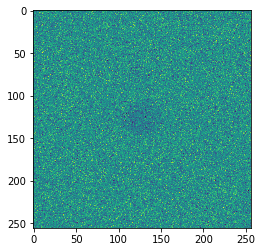

In [25]:
plt.imshow(x1.flip(2)[0,0,-11,:,:].squeeze().numpy())

In [35]:
np.fromfile(r"/home/sms/vws/test/data/data/y_2.1.bin", dtype=np.float32)

array([0.4408385, 0.6764221, 0.6778049], dtype=float32)

tensor([[[[[ 1.1815,  0.9578,  0.0776,  ..., -0.1350,  0.9081,  0.7467],
           [ 1.1141,  0.8532,  0.7013,  ...,  0.7619,  0.6945,  0.5347],
           [ 1.0069,  1.0495,  0.7307,  ...,  0.8828,  0.6435,  0.5299],
           ...,
           [ 0.3114,  0.4194,  0.7311,  ...,  0.7480,  0.3592,  0.6464],
           [ 0.9097,  0.1702,  0.7784,  ...,  1.0341,  0.3632,  0.0417],
           [ 0.3185,  0.6063,  0.5054,  ...,  0.4507,  0.7653,  0.7442]],

          [[ 0.1908,  1.0160,  0.5359,  ...,  0.6703,  0.2724,  0.6653],
           [ 0.5557,  0.6526,  0.5512,  ...,  0.2194,  0.9649,  0.8300],
           [ 0.7457,  0.3371,  0.2955,  ...,  0.5825,  1.2777,  0.7231],
           ...,
           [ 0.1655,  0.5037,  0.8874,  ...,  0.7617,  0.3352,  0.9700],
           [ 0.4634,  0.2121,  0.7177,  ...,  0.4739,  0.3796,  0.2660],
           [ 1.0112,  0.3017,  0.9048,  ...,  0.4183, -0.2276,  0.5285]],

          [[ 0.6464,  1.2310,  0.9416,  ...,  0.4928,  0.1287,  0.4178],
           [ 0.